In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Wczytanie danych z pliku CSV
df = pd.read_excel('UE oczami studentow.xlsx')
df1 = pd.read_excel('dane_rozbite.xlsx', sheet_name = 'wykresy')

In [14]:
data_list = df1 
liczba_wierszy = len(data_list)
print("Liczba wierszy:", liczba_wierszy)


Liczba wierszy: 1831


In [15]:
df.head()

,Id,Name,Czy obecnie studiujesz?,Czy interesujesz się polską polityką?,"Czy uważasz, że Twoi znajomi, którzy studiują, interesują się polską polityką?",Czy uczestniczył_ś w ostatnich wyborach parlamentarnych?,Jak często śledzisz wiadomości i wydarzenia związane z polską polityką?,Z jakich źródeł czerpiesz informacje dotyczące polskiej polityki?,Czy interesujesz się polityką Unii Europejskiej?,"Czy uważasz, że Twoi znajomi, którzy studiują, interesują się polityką Unii Europejskiej?",...,Płeć,Wiek,Rok studiów,Uczelnia:,Kierunek studiów:,Miejsce zamieszkania:,Miejsce pochodzenia:,Województwo zamieszkania:,Województwo pochodzenia:,Z poglądami której partii politycznej najbardziej się identyfikujesz?
0,1,NaN,Tak,Nie,Trudno powiedzieć,Tak,Rzadziej niż raz w miesiącu,Telewizja;Social media;Portale informacyjne;,Nie,Trudno powiedzieć,...,Kobieta,23.0,III,Uniwersytet Gdański,Międzynarodowe stosunki gospodarcze handel zag...,Miasto od 150 do 500 tys. mieszkańców,Miasto od 150 do 500 tys. mieszkańców,Pomorskie,Pomorskie,Trzecia Droga
1,2,NaN,Tak,Tak,Tak,Tak,"Tak, codziennie",Social media;Portale informacyjne;Telewizja;,Trudno powiedzieć,Nie,...,Mężczyzna,23.0,V (II rok studiów 2-go stopnia),Uniwersytet Warszawski,Politologia,Miasto powyżej 500 tys. mieszkańców,Miasto od 50 do 150 tys. mieszkańców,Mazowieckie,Łódzkie,Koalicja Obywatelska
2,3,NaN,Tak,Tak,Tak,Tak,Kilka razy w tygodniu,Social media;Portale informacyjne;Podcasty;,Tak,Trudno powiedzieć,...,Kobieta,20.0,II,Uw,Hf,Miasto powyżej 500 tys. mieszkańców,Wieś,Małopolskie,Lubuskie,Nie chcę podawać/Trudno powiedzieć
3,4,NaN,Tak,Tak,Tak,Nie,Kilka razy w miesiącu,Social media;Telewizja,Nie,Nie,...,Kobieta,76.0,I,Uniwersytet Ekonomiczny w Poznaniu,Kj,Miasto do 50 tys. mieszkańców,Miasto do 50 tys. mieszkańców,Małopolskie,Kujawsko-pomorskie,Nowa Lewica
4,6,NaN,Nie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#import pandas as pd

# Usunięcie pustych wartości
#df_cleaned = df.dropna(subset=['Czy interesujesz się polską polityką?'])

# Wyświetlenie wyniku
#print(df_cleaned)


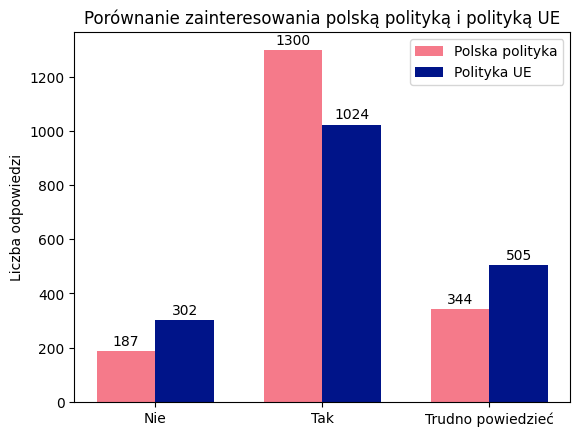

In [33]:
# Usunięcie pustych znaków z nazw kolumn
df1.columns = df1.columns.str.strip()


columns = ['Czy interesujesz się polską polityką?', 'Czy interesujesz się polityką Unii Europejskiej?']

fig, ax = plt.subplots()

# Kolory i rozmiar
colors = ['#F57A8A', '#001489']


# Pętla na utworzenie wykresu słupkowego 
for i, column in enumerate(columns):
    # Lista unikalnych odpowiedzi dla danej kolumny
    responses = df1[column].astype(str).unique()
    responses = [response for response in responses if response != 'nan']

    all_responses = np.union1d(responses, responses)
    
    # Zliczenia
    counts = df1.groupby(column).size().reindex(all_responses, fill_value=0)
    
    # Utworzenie tablicy indeksów dla odpowiedzi, czyli "nie", "tak", "trudno powiedzieć"
    indices = np.arange(len(all_responses))
    
    bar_width = 0.35
    
    # Tworzenie wykresu 
    ax.bar(indices + i * bar_width, counts, bar_width, color=colors[i])
    
    # Etykiety
    for j in range(len(all_responses)):
        ax.text(indices[j] + i * bar_width, counts[j] + 10, str(counts[j]), ha='center', va='bottom')

# Etykiety typów odp
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(all_responses)


ax.set_title('Porównanie zainteresowania polską polityką i polityką UE')
ax.set_xlabel('')
ax.set_ylabel('Liczba odpowiedzi')
legend_labels = ['Polska polityka', 'Polityka UE']
ax.legend(legend_labels)

plt.savefig('zainteresowanie_polityka - porownanie.png')

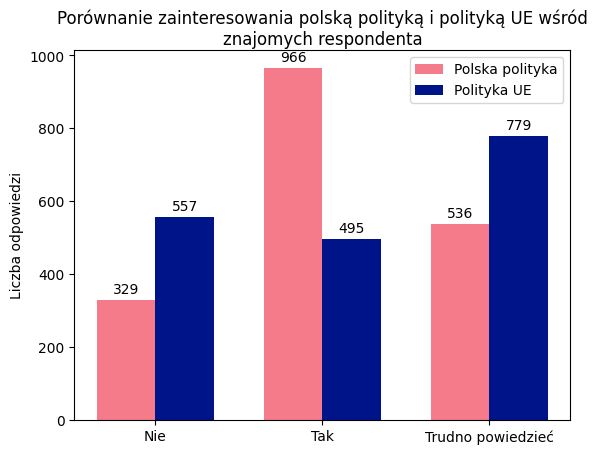

In [32]:
# Definicja nazw kolumn
columns = ['Czy uważasz, że Twoi znajomi, którzy studiują, interesują się polską polityką?', 'Czy uważasz, że Twoi znajomi, którzy studiują, interesują się polityką Unii Europejskiej?']

# Utworzenie figury i osi
fig, ax = plt.subplots()

# Kolor dla każdej kolumny
colors = ['#F57A8A', '#001489']

# Utworzenie wykresu słupkowego dla każdej kolumny
for i, column in enumerate(columns):
    # Lista unikalnych odpowiedzi dla danej kolumny
    responses = df1[column].astype(str).unique()
    responses = [response for response in responses if response != 'nan']

    # Utworzenie pełnej listy unikalnych odpowiedzi
    all_responses = np.union1d(responses, responses)
    
    
    # Utworzenie słowników zliczeń dla danej kolumny
    counts = df1.groupby(column).size().reindex(all_responses, fill_value=0)
    
    # Utworzenie tablicy indeksów dla odpowiedzi
    indices = np.arange(len(all_responses))
    
    # Szerokość pojedynczego słupka
    bar_width = 0.35
    
    # Utworzenie wykresu słupkowego
    ax.bar(indices + i * bar_width, counts, bar_width, color=colors[i])
    
    # Dodanie etykiet z liczbami nad słupkami
    for j in range(len(all_responses)):
        ax.text(indices[j] + i * bar_width, counts[j] + 10, str(counts[j]), ha='center', va='bottom')

# Dodanie nazw odpowiedzi jako etykiet osi x
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(all_responses)

# Dodanie tytułu i etykiet osi
ax.set_title('Porównanie zainteresowania polską polityką i polityką UE wśród znajomych respondenta', wrap = True)
ax.set_xlabel('')
ax.set_ylabel('Liczba odpowiedzi')

# Dodanie legendy
legend_labels = ['Polska polityka', 'Polityka UE']
ax.legend(legend_labels)

# Wyświetlenie wykresu
plt.savefig('zainteresowanie_polityka_znajomi - porownanie.png')

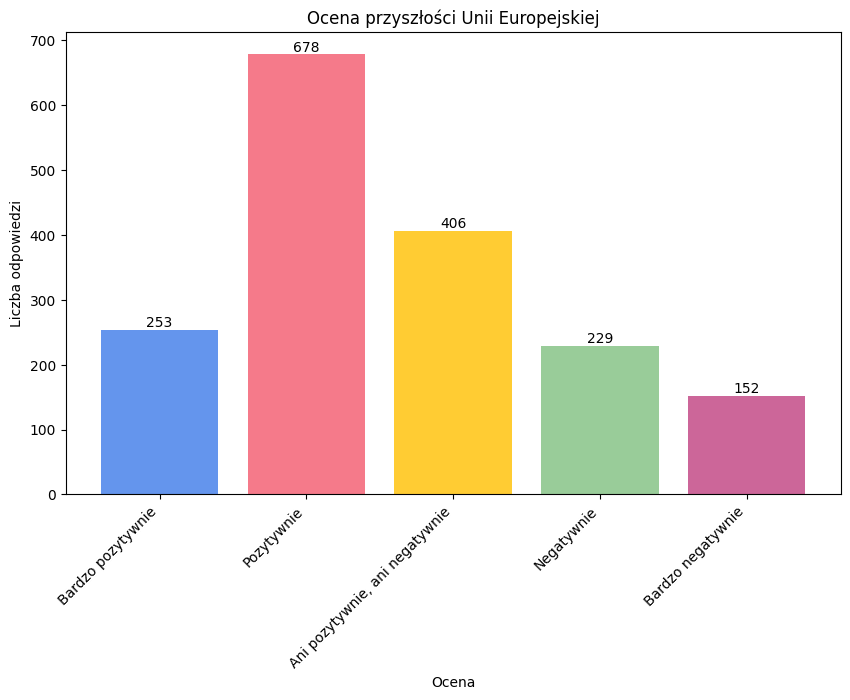

In [46]:

# Zliczenia
ue_ratings_counts = df['Jak prognozujesz przyszłość związaną z członkostwem Polski w Unii Europejskiej?'].value_counts(dropna=True)

# Order the categories
category_order = ['Bardzo pozytywnie', 'Pozytywnie', 'Ani pozytywnie, ani negatywnie', 'Negatywnie', 'Bardzo negatywnie']
ue_ratings_counts = ue_ratings_counts.reindex(category_order)
colors = ["cornflowerblue", "#F57A8A", "#FFCC33", "#99CC99", "#CC6699", "#E6E6FA", 'goldenrod']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(ue_ratings_counts.index, ue_ratings_counts.values, color=colors)

# Add labels on the bars
for i, v in enumerate(ue_ratings_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Add title and axis labels
plt.title('Ocena przyszłości Unii Europejskiej')
plt.xlabel('Ocena')
plt.ylabel('Liczba odpowiedzi')
plt.xticks(rotation=45, ha='right')

# Save the figure
plt.savefig('przyszlosc-ue.png')

# Show the plot
plt.show()


In [49]:
#check
ue_ratings_counts.head()

Bardzo pozytywnie                 253
Pozytywnie                        678
Ani pozytywnie, ani negatywnie    406
Negatywnie                        229
Bardzo negatywnie                 152
Name: Jak prognozujesz przyszłość związaną z członkostwem Polski w Unii Europejskiej?, dtype: int64

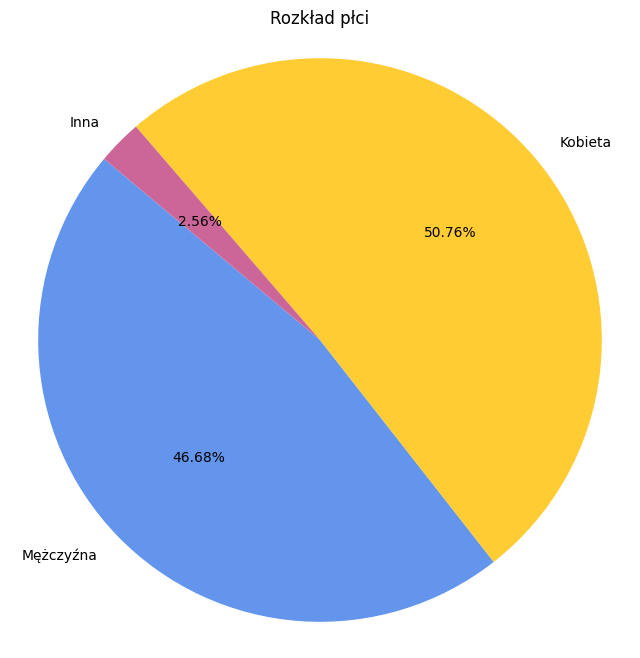

In [50]:
#Metryczka

men = df[df['Płeć'] == 'Mężczyzna'].shape[0]
women = df[df['Płeć'] == 'Kobieta'].shape[0]
other = df[df['Płeć'] == 'Inna'].shape[0]

colors = ["cornflowerblue", "#FFCC33", "#CC6699", "#E6E6FA", 'goldenrod']

plt.figure(figsize=(8, 8))
plt.pie([men, women, other], labels=['Mężczyźna', 'Kobieta', 'Inna'], autopct='%1.2f%%', startangle=140, colors = colors)
plt.title('Rozkład płci')
plt.axis('equal') 
plt.savefig('plec.png')

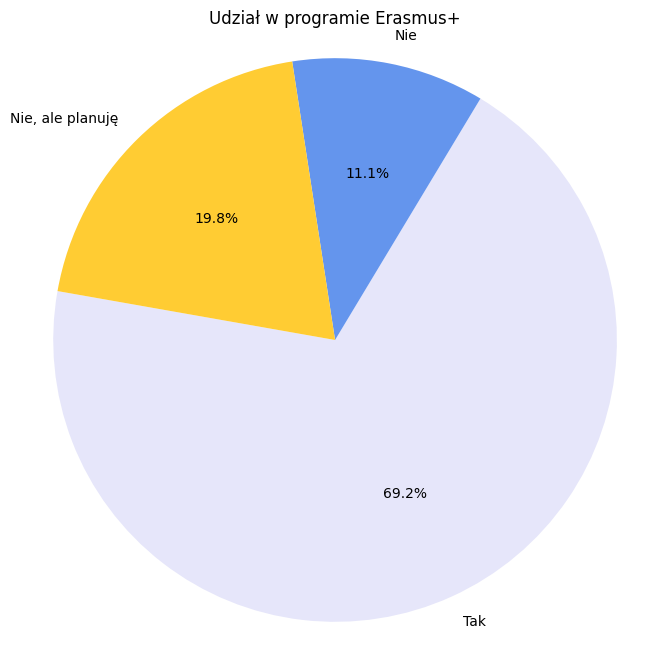

In [52]:
#Erasmus

tak = df[df['Czy brał_ś kiedyś udział w wymianie zagranicznej Erasmus+?'] == 'Tak'].shape[0]
nie = df[df['Czy brał_ś kiedyś udział w wymianie zagranicznej Erasmus+?'] == 'Nie'].shape[0]
plan = df[df['Czy brał_ś kiedyś udział w wymianie zagranicznej Erasmus+?'] == 'Nie, ale planuję'].shape[0]

colors = ["#E6E6FA", "cornflowerblue", "#FFCC33", "#CC6699" 'goldenrod']

plt.figure(figsize=(8, 8))
plt.pie([nie, tak, plan], labels=['Tak', 'Nie', 'Nie, ale planuję'], autopct='%1.1f%%', startangle=170, colors = colors)
plt.title('Udział w programie Erasmus+')
plt.axis('equal') 
plt.savefig('Erasmus.png')

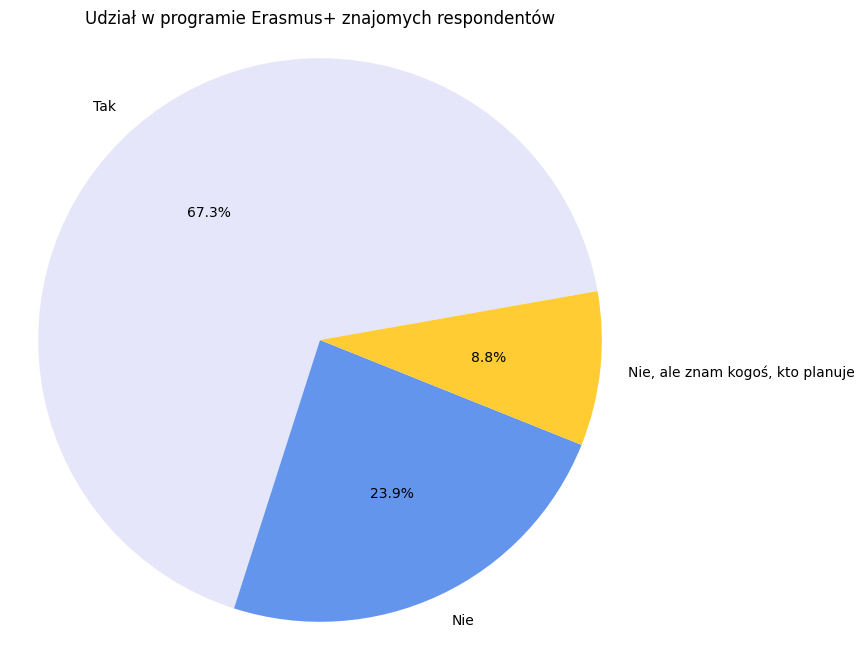

In [53]:
#Erasmus

tak = df[df['Czy wśród znajomych masz kogoś, kto brał udział w wymianie zagranicznej Erasmus+? '] == 'Tak'].shape[0]
nie = df[df['Czy wśród znajomych masz kogoś, kto brał udział w wymianie zagranicznej Erasmus+? '] == 'Nie'].shape[0]
plan = df[df['Czy wśród znajomych masz kogoś, kto brał udział w wymianie zagranicznej Erasmus+? '] == 'Nie, ale znam kogoś, kto planuje'].shape[0]

colors = ["#E6E6FA", "cornflowerblue", "#FFCC33", "#CC6699" 'goldenrod']

plt.figure(figsize=(8, 8))
plt.pie([tak, nie, plan], labels=['Tak', 'Nie', 'Nie, ale znam kogoś, kto planuje'], autopct='%1.1f%%', startangle=10, colors = colors)
plt.title('Udział w programie Erasmus+ znajomych respondentów')
plt.axis('equal') 
plt.savefig('Erasmus-znajomi.png')

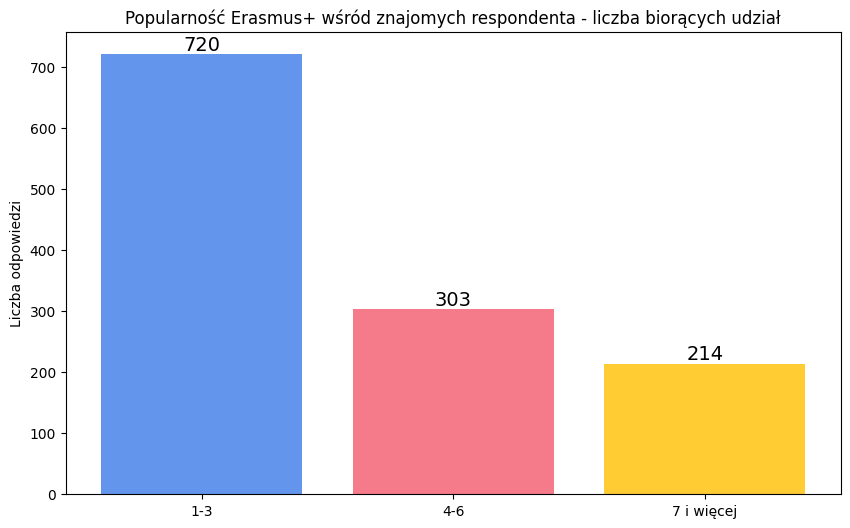

In [56]:
#Erasmus

a = df1[df1['Jeśli tak, to ile osób?'] == '1-3'].shape[0]
b = df1[df1['Jeśli tak, to ile osób?'] == '4-6'].shape[0]
c = df1[df1['Jeśli tak, to ile osób?'] == '7 i więcej'].shape[0]

colors=["cornflowerblue", "#F57A8A", "#FFCC33", "#99CC99", "#CC6699", "#E6E6FA", 'goldenrod']

plt.figure(figsize=(10, 6))
plt.bar(['1-3', '4-6', '7 i więcej'], [a, b, c], color=colors)  # Poprawiono przekazywanie wysokości i kolorów
plt.title('Popularność Erasmus+ wśród znajomych respondenta - liczba biorących udział')
plt.ylabel('Liczba odpowiedzi')
plt.xticks(ha='center')

for i, v in enumerate([a, b, c]):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=14)

plt.savefig('Erasmus-ile-znajomi.png')
plt.show()

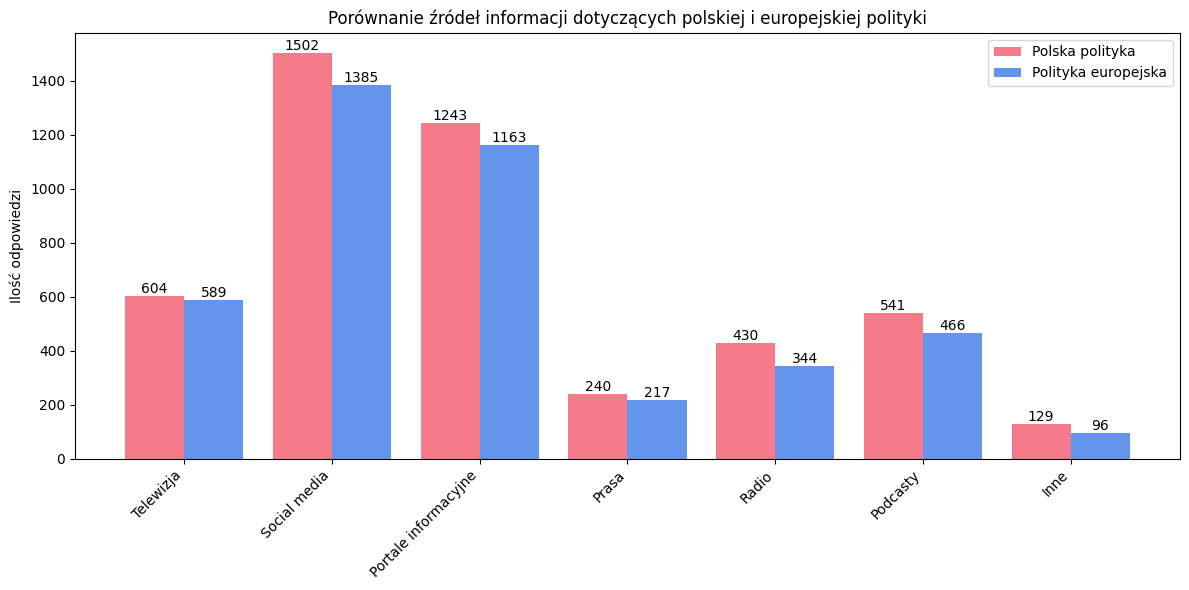

In [64]:
#Wielokrotny wybór - zrodla info,
# Dane dla polskiej polityki
kategorie_pl = ['Telewizja', 'Social media', 'Portale informacyjne', 'Prasa', 'Radio', 'Podcasty', 'Inne']
liczby_pl = [604, 1502, 1243, 240, 430, 541, 129] #zliczenia pobrane z Google Forms
colors_pl = ["#F57A8A"]

# Dane dla polityki europejskiej
kategorie_ue = ['Telewizja', 'Social media', 'Portale informacyjne', 'Prasa', 'Radio', 'Podcasty', 'Inne']
liczby_ue = [589, 1385, 1163, 217, 344, 466, 96]
colors_ue = ["cornflowerblue"]

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Wykres kolumnowy dla polskiej polityki
plt.bar([i-0.2 for i in range(len(kategorie_pl))], liczby_pl, width=0.4, color=colors_pl, label='Polska polityka')

# Wykres kolumnowy dla polityki europejskiej
plt.bar([i+0.2 for i in range(len(kategorie_ue))], liczby_ue, width=0.4, color=colors_ue, label='Polityka europejska')

# Wyświetlenie wartości liczbowych nad kolumnami dla polskiej polityki
for i in range(len(kategorie_pl)):
    plt.text(i-0.2, liczby_pl[i], str(liczby_pl[i]), ha='center', va='bottom')

# Wyświetlenie wartości liczbowych nad kolumnami dla polityki europejskiej
for i in range(len(kategorie_ue)):
    plt.text(i+0.2, liczby_ue[i], str(liczby_ue[i]), ha='center', va='bottom')

# Konfiguracja wykresu
plt.xticks(range(len(kategorie_pl)), kategorie_pl, rotation=45, ha='right')
plt.ylabel('Ilość odpowiedzi')
plt.title('Porównanie źródeł informacji dotyczących polskiej i europejskiej polityki')
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.savefig('porownanie-zrodel-info.png')
plt.show()


In [65]:
df1['Rok studiów'] = df1['Rok studiów'].replace({'V (II rok studiów 2-go stopnia)': 'V (II rok II st.)'})
liczba_studentow = df1['Rok studiów'].value_counts().sort_index()


In [66]:
procenty = {rok: (liczba / 1831) * 100 for rok, liczba in liczba_studentow.items()}

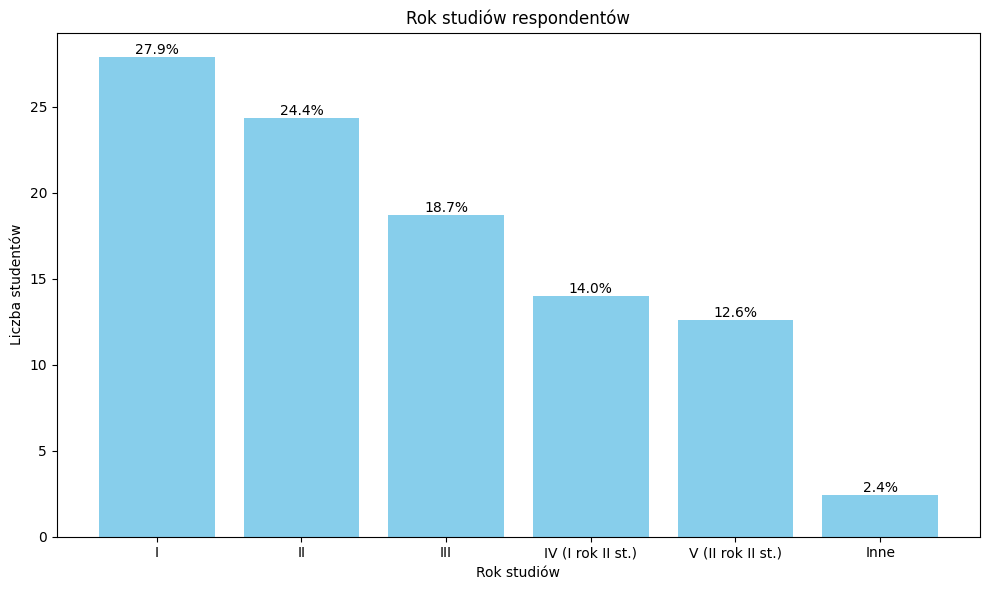

In [70]:
# Przykładowe dane - zakładam, że masz odpowiednią serię danych liczbowych liczba_studentow
liczba_studentow = pd.Series({'I': 511, 'II': 446, 'III': 343, 'IV (I rok II st.)': 256, 'V (II rok II st.)': 231, 'Inne': 44}) #zliczenia pobrane z wyników Google Forms

# Obliczenie procentowego udziału
procenty = liczba_studentow / liczba_studentow.sum() * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(procenty.index, procenty.values, color='skyblue')

# Dodanie wartości procentowych nad kolumnami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}%", va='bottom', ha='center')

plt.title('Rok studiów respondentów')
plt.xlabel('Rok studiów')
plt.ylabel('Liczba studentów')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('rok_studiow_procent.png')
plt.show()


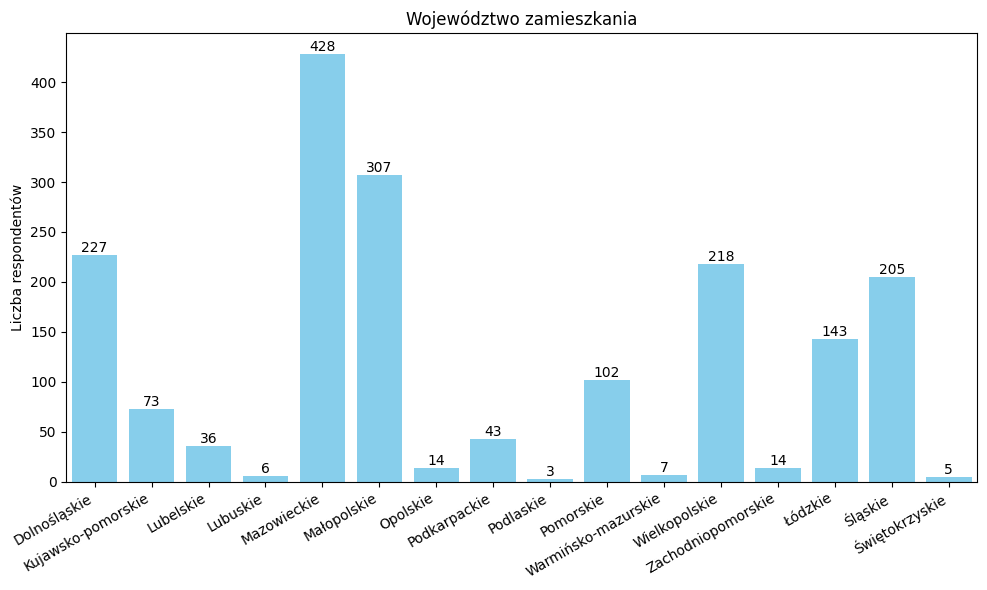

In [75]:
woj_zam = df1['Województwo zamieszkania:'].value_counts().sort_index()


plt.figure(figsize=(10,6))
bars = plt.bar(woj_zam.index, woj_zam.values, color='skyblue')

##CC6699
woj_zam.plot(kind='bar', color='skyblue')
plt.title('Województwo zamieszkania')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=30, ha='right')
plt.tight_layout() 


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')


plt.savefig('woj_zam.png')

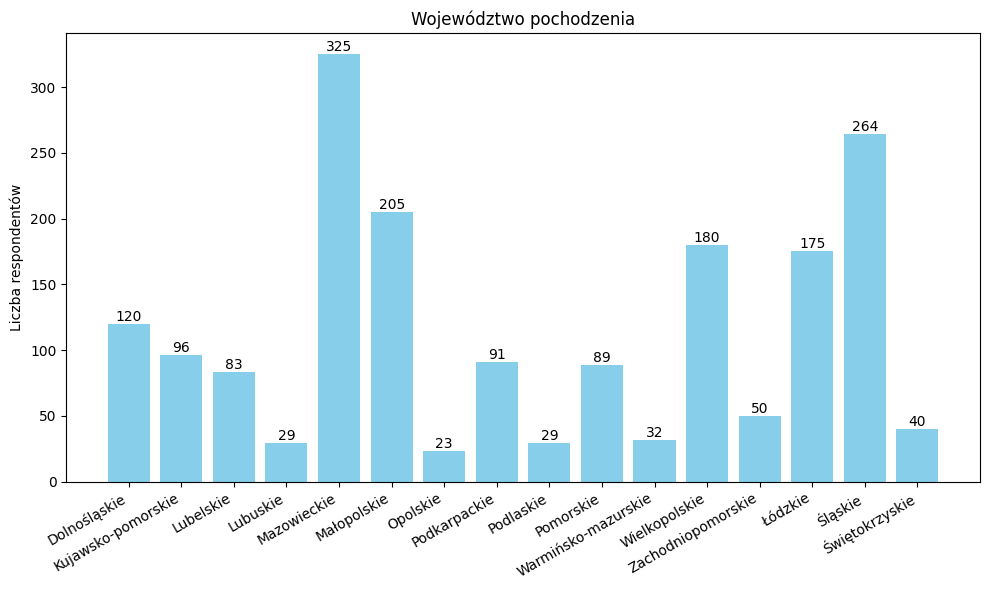

In [76]:
# Zliczenie wystąpień każdej odpowiedzi
woj_poch = df1['Województwo pochodzenia:'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(woj_poch.index, woj_poch.values, color='skyblue')

plt.title('Województwo pochodzenia')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()  

# Dodanie wartości liczbowych nad kolumnami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.savefig('woj_poch.png')
plt.show()


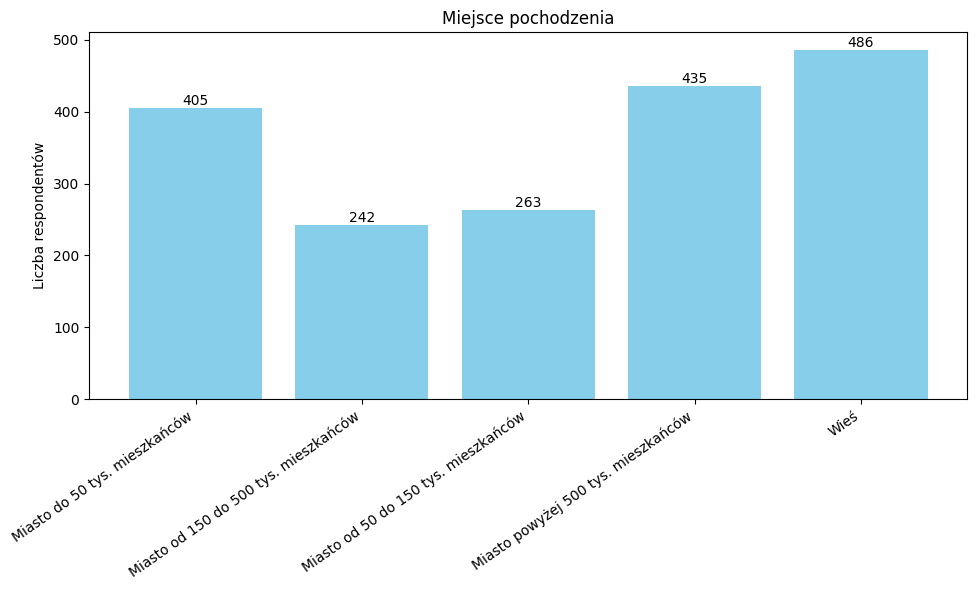

In [77]:
woj_poch = df1['Miejsce pochodzenia:'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(woj_poch.index, woj_poch.values, color='skyblue')

plt.title('Miejsce pochodzenia')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=35, ha='right')
plt.tight_layout() 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.savefig('m_poch.png')
plt.show()


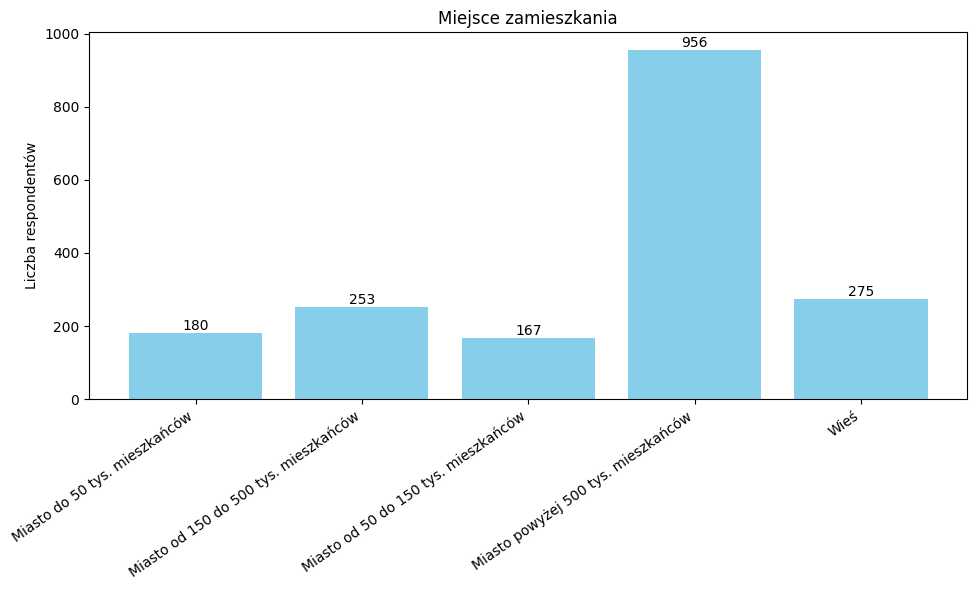

In [78]:
woj_poch = df1['Miejsce zamieszkania:'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(woj_poch.index, woj_poch.values, color='skyblue')

plt.title('Miejsce zamieszkania')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()

# Dodanie wartości liczbowych nad kolumnami
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.savefig('m_zam.png')
plt.show()


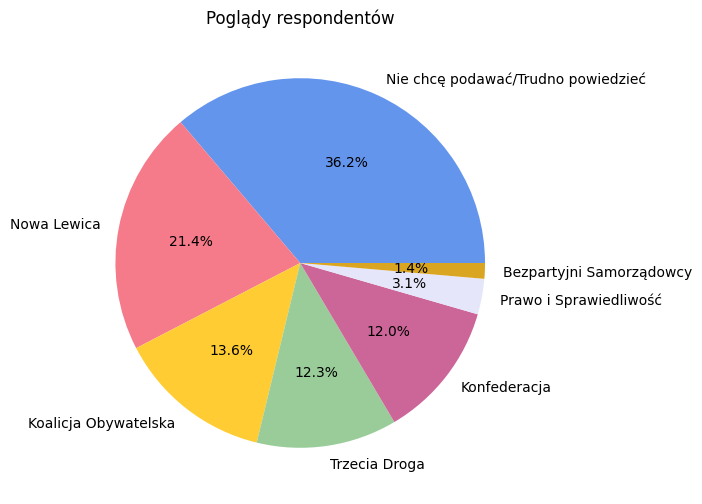

In [252]:
poglad = df1['Z poglądami której partii politycznej najbardziej się identyfikujesz?'].value_counts()

plt.figure(figsize=(10, 6))
colors = ["cornflowerblue", "#F57A8A", "#FFCC33", "#99CC99", "#CC6699", "#E6E6FA", 'goldenrod']
plt.pie(poglad, labels=poglad.index, autopct='%1.1f%%', colors=colors)

plt.title('Poglądy respondentów')
plt.savefig('poglad_pie.png')
plt.show()


C:\Users\magda\AppData\Local\Temp\ipykernel_17460\3875841230.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')  # Ustawienie etykiet na osi x z odpowiednią rotacją i wyrównaniem
C:\Users\magda\AppData\Local\Temp\ipykernel_17460\3875841230.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')  # Ustawienie etykiet na osi x z odpowiednią rotacją i wyrównaniem
C:\Users\magda\AppData\Local\Temp\ipykernel_17460\3875841230.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')  # Ustawienie etykiet na osi x z odpowiednią rotacją i wyrównaniem


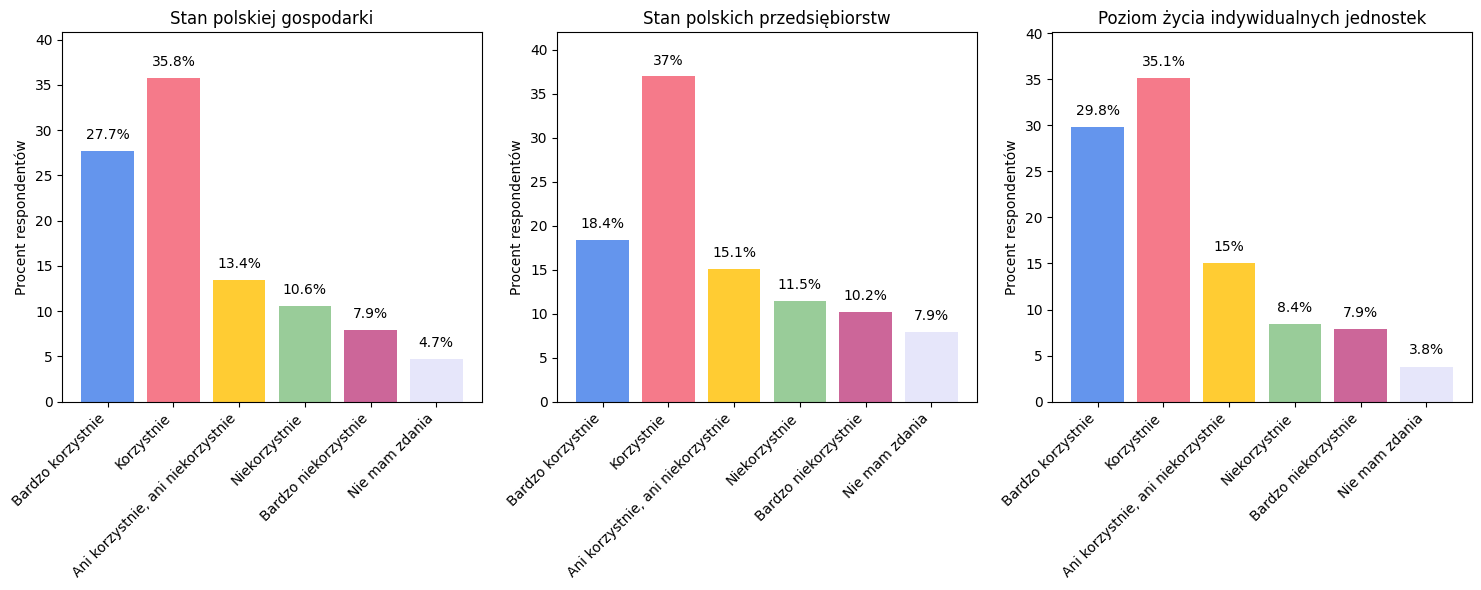

In [22]:
def wizualizuj_wyniki(wyniki):
    kwestie = list(wyniki.keys())
    odpowiedzi = list(wyniki.values())

    fig, axs = plt.subplots(1, 3, figsize=(15, 6))

    # Kolory do wykresów
    colors = ["cornflowerblue", "#F57A8A", "#FFCC33", "#99CC99", "#CC6699", "#E6E6FA", 'goldenrod']

    for i, (kwestia, ax) in enumerate(zip(kwestie, axs)):
        labels = list(odpowiedzi[i].keys())
        values = list(odpowiedzi[i].values())

        # Zamiana liczby respondentów na procenty
        total_responses = sum(values)
        values_percent = values

        ax.bar(labels, values_percent, color=colors, align='center')  # Wycentrowanie etykiet na osi x
        ax.set_title(kwestia)
        ax.set_ylabel('Procent respondentów')
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(labels, rotation=45, ha='right')  # Ustawienie etykiet na osi x z odpowiednią rotacją i wyrównaniem


        for index, value in enumerate(values_percent):
            ax.text(index, value + 1, f'{value}%', ha='center', va='bottom')  # Dostosowanie parametru va
            
            ax.set_ylim(0, max(values_percent) + 5)


    plt.tight_layout()
    plt.savefig('ocena-trzy-kwestie.png')
    plt.show()

    
# Przykładowe wyniki ankiety
wyniki = {
    "Stan polskiej gospodarki": {
        "Bardzo korzystnie": 27.7,
        "Korzystnie": 35.8,
        "Ani korzystnie, ani niekorzystnie": 13.4,
        "Niekorzystnie": 10.6,
        "Bardzo niekorzystnie": 7.9,
        "Nie mam zdania": 4.7
    },
    "Stan polskich przedsiębiorstw": {
        "Bardzo korzystnie": 18.4,
        "Korzystnie": 37,
        "Ani korzystnie, ani niekorzystnie": 15.1,
        "Niekorzystnie": 11.5,
        "Bardzo niekorzystnie": 10.2,
        "Nie mam zdania": 7.9
    },
    "Poziom życia indywidualnych jednostek": {
        "Bardzo korzystnie": 29.8,
        "Korzystnie": 35.1,
        "Ani korzystnie, ani niekorzystnie": 15,
        "Niekorzystnie": 8.4,
        "Bardzo niekorzystnie": 7.9,
        "Nie mam zdania": 3.8
    }
}

wizualizuj_wyniki(wyniki)

